# Importing important libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 

# Reading the dataset


In [ ]:
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url) 
titanic.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Data Analysis

In [ ]:
titanic.shape

(891, 11)

There are **891** rows & **11 columns**. This means there are 891 datapoints in the dataset & 11 features.

In [ ]:
titanic.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

Out of these features, the feature **'survived' is the target feature**. 

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


*  There are **5 object fields** which needs to be encoded. 

*  'age', 'cabin' & embarked has some **missing values**


So I need to know how many Nan values are there in each columns.

In [ ]:
titanic.isna().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

# Data Visualization

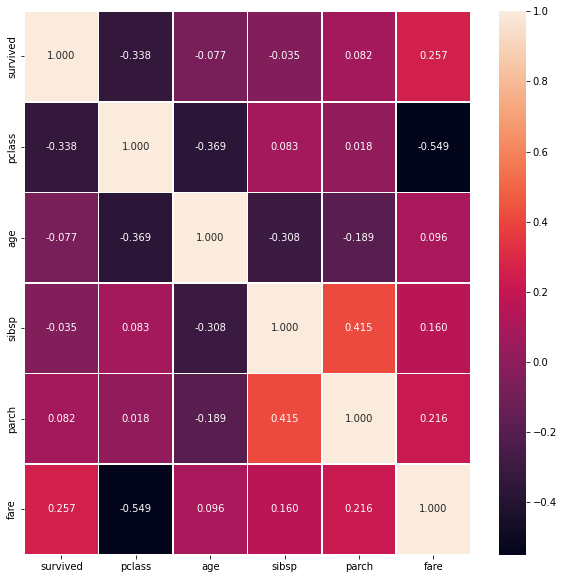

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
sns.heatmap(titanic.corr(), annot=True, linewidths=0.5, fmt= '.3f')

In [ ]:
titanic.corr()


,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


By the previous knowledge we have, let's create a new feature telling **whether the passenger is man, woman or a child.**

In [ ]:
def woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]

In [ ]:
titanic["who"] = titanic[["age", "sex"]].apply(woman_child_or_man, axis=1)
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,who
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,woman
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,woman
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,woman
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man


We will create another feature to see wether a person was an adult male or not.

In [ ]:
titanic["adult_male"] = titanic.who == "man"
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,who,adult_male
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,woman,False
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,woman,False
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,woman,False
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man,True


We can have another feature with the deck information.

In [ ]:
titanic["deck"] = titanic.cabin.str[0]
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,who,adult_male,deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man,True,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,woman,False,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,woman,False,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,woman,False,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man,True,NaN


Now one more feature can be created, whether the passenger was alone or not. So let's do this.

In [ ]:
titanic["alone"] = ~(titanic.parch + titanic.sibsp).astype(bool)
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,who,adult_male,deck,alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man,True,NaN,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,woman,False,C,False
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,woman,False,NaN,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,woman,False,C,False
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man,True,NaN,True


Now let's try to look at the trends in different feature.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


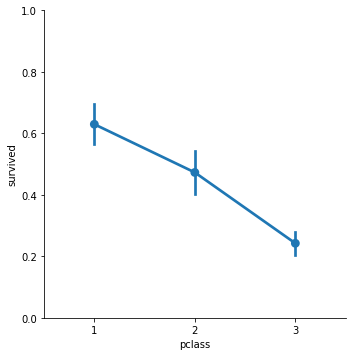

In [ ]:
sns.factorplot("pclass", "survived", data=titanic).set(ylim=(0, 1))


From here we see that if a passenger travelled in 1st class, the survival rate is highest and equal to 0.63. If a passenger travelled in 2nd class, the survival rate is medium and equal to 0.5. If a passenger travelled in 3rd class, the survival rate is lowest and equal to 0.3

Let's see how the above case is dependent on the **sex of the passenger.**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


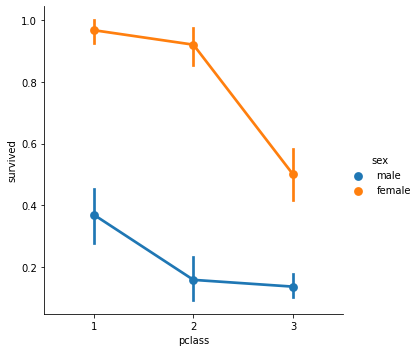

In [ ]:
sns.factorplot("pclass", "survived", data=titanic, hue="sex")

It;s pretty clear that the surviavl of female passengers is much more than the male passengers. From here we see that if a passenger travelled in 1st class and was female then their survival chance is most. On the other hand, if a passenger travelled in 3rd class amd was male then their survival chance is least. So we can combine these two features to **create new feature**.

Let's have a similar observation with the features **'class' & 'who'**  

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


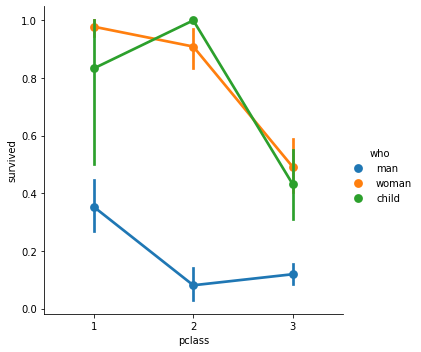

In [ ]:
sns.factorplot("pclass", "survived", data=titanic, hue="who")

From here also we can have similar observation. We get 9 cases from here and we will be building a feature based on it in a while.

Let's try to find the trends with **the feature 'alone' & 'adult_male'**.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


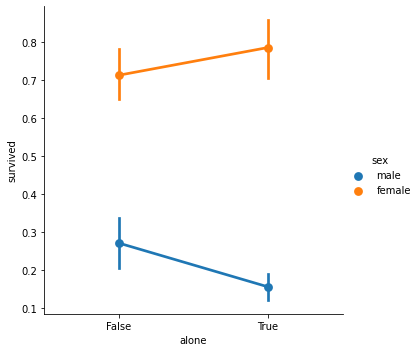

In [ ]:
sns.factorplot("alone", "survived", data=titanic, hue="sex")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


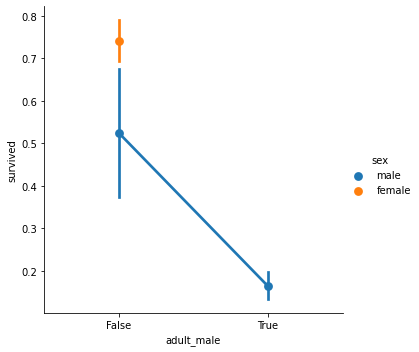

In [ ]:
sns.factorplot("adult_male", "survived", data=titanic, hue="sex")

Now let's see what effect does the feature **'deck'** has.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


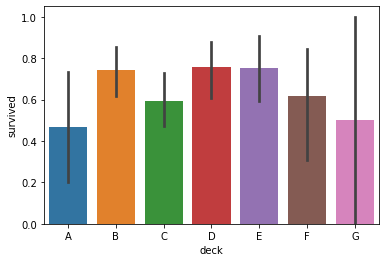

In [ ]:
sns.barplot("deck", "survived", data=titanic,order=['A','B','C','D','E','F','G'])

Now let's try to combine 3 features together.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


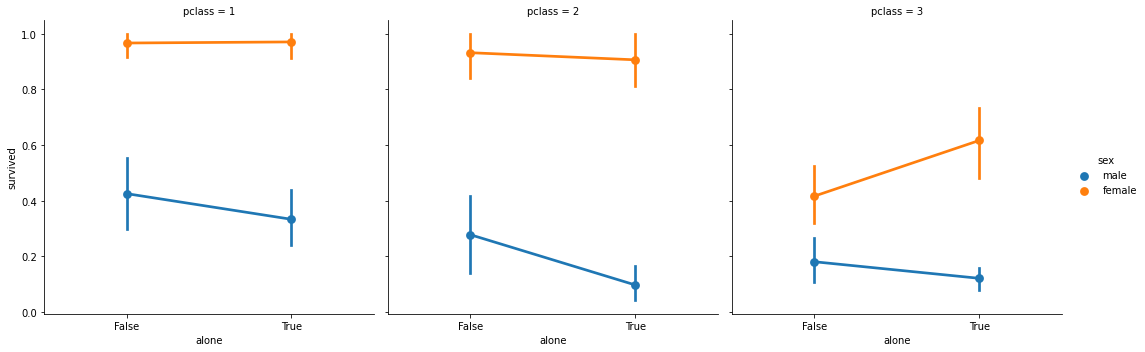

In [ ]:
sns.factorplot("alone", "survived", data=titanic, hue="sex",col="pclass")

# Data Preprocessing

Let's have the object fields encoded.

In [ ]:
#encoding deck

dk = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}
titanic['deck']=titanic.deck.map(dk)
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,who,adult_male,deck,alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man,True,NaN,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,woman,False,3.0,False
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,woman,False,NaN,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,woman,False,3.0,False
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man,True,NaN,True


In [ ]:
# encoding embarked


titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [ ]:
e = {'S':3,'Q':2, 'C':1}
titanic['embarked']=titanic.embarked.map(e)
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,who,adult_male,deck,alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,3.0,man,True,NaN,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0,woman,False,3.0,False
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0,woman,False,NaN,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,3.0,woman,False,3.0,False
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,3.0,man,True,NaN,True


In [ ]:
# encoding gender

genders = {"male": 0, "female": 1}
titanic['sex'] = titanic['sex'].map(genders)
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,who,adult_male,deck,alone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,3.0,man,True,NaN,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,woman,False,3.0,False
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0,woman,False,NaN,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3.0,woman,False,3.0,False
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,3.0,man,True,NaN,True


In [ ]:
#encoding who

wh = {'child':3,'woman':2, 'man':1}
titanic['who']=titanic.who.map(wh)

In [ ]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,who,adult_male,deck,alone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,3.0,1,True,NaN,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,2,False,3.0,False
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0,2,False,NaN,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3.0,2,False,3.0,False
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,3.0,1,True,NaN,True


Now we need to impute the **Missing Values**

There are alot of missing values in deck. So we will simply fill it with **0**

In [ ]:
#imputing deck
titanic['deck']=titanic['deck'].fillna(0)
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,who,adult_male,deck,alone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,3.0,1,True,0.0,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,2,False,3.0,False
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0,2,False,0.0,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3.0,2,False,3.0,False
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,3.0,1,True,0.0,True


There are only 2 missing vaues in 'embarked'. So we will find out which of the values in embarked has **maximum occurence** and fill the missing values with **that value**.

In [ ]:
#imputing embarked

titanic['embarked'].value_counts()

3.0    644
1.0    168
2.0     77
Name: embarked, dtype: int64

In [ ]:
titanic['embarked']=titanic['embarked'].fillna('3.0')
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,who,adult_male,deck,alone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,3.0,1,True,0.0,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,2,False,3.0,False
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0,2,False,0.0,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3.0,2,False,3.0,False
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,3.0,1,True,0.0,True


Now we will impute the missing values in **'age'**.

In [ ]:
#imputing age

m=titanic['age'].mean()
m


29.69911764705882

In [ ]:
titanic['age']=titanic['age'].fillna(m)
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,who,adult_male,deck,alone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,3.0,1,True,0.0,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,2,False,3.0,False
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0,2,False,0.0,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3.0,2,False,3.0,False
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,3.0,1,True,0.0,True


# Adding New Features

In [ ]:
def process_family(parameters):
     
    x,y=parameters
    
    # introducing a new feature : the size of families (including the passenger)
    family_size = x+ y + 1
    
    if (family_size==1):
      return 1 # for singleton
    elif(2<= family_size <= 4 ):
      return 2 #for small family
    else:
      return 3 #for big family 

In [ ]:
titanic['FAM_SIZE']= titanic[['parch','sibsp']].apply(process_family, axis=1)
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,who,adult_male,deck,alone,FAM_SIZE
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,3.0,1,True,0.0,False,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,2,False,3.0,False,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0,2,False,0.0,True,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3.0,2,False,3.0,False,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,3.0,1,True,0.0,True,1


In [ ]:
# to get title from the name.

titles = set()
for name in titanic['name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [ ]:
titles #all the salutations present in my dataset.

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [ ]:
len(titles)

17

In [ ]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [ ]:
def get_titles():
    # we extract the title from each name
    titanic['title'] = titanic['name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    titanic['title'] = titanic.title.map(Title_Dictionary)
    return titanic

In [ ]:
titanic = get_titles()
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,who,adult_male,deck,alone,FAM_SIZE,title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,3.0,1,True,0.0,False,2,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,2,False,3.0,False,2,Mrs
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0,2,False,0.0,True,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3.0,2,False,3.0,False,2,Mrs
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,3.0,1,True,0.0,True,1,Mr


Now we need to encode these titles. Right now I will use one-hot encoding with this.

In [ ]:
titles_dummies = pd.get_dummies(titanic['title'], prefix='title')
titanic = pd.concat([titanic, titles_dummies], axis=1)
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,deck,alone,FAM_SIZE,title,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,...,0.0,False,2,Mr,0,0,1,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,...,3.0,False,2,Mrs,0,0,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0.0,True,1,Miss,0,1,0,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,...,3.0,False,2,Mrs,0,0,0,1,0,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,...,0.0,True,1,Mr,0,0,1,0,0,0


And finally the Feature that we observed during the visualization.

In [ ]:
def new_fe(parameters):
  p,w=parameters
  
  if (p==1):
    if (w==1):
      return 1
    elif (w==2):
      return 2
    elif (w==3):
      return 3
  elif (p==2):
    if (w==1):
      return 4
    elif (w==2):
      return 5
    elif (w==3):
      return 6
  elif (p==3):
    if (w==1):
      return 7
    elif (w==2):
      return 8
    elif (w==3):
      return 9

In [ ]:
titanic['pcl_wh']= titanic[['pclass','who']].apply(new_fe, axis=1)
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,alone,FAM_SIZE,title,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,pcl_wh
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,...,False,2,Mr,0,0,1,0,0,0,7
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,...,False,2,Mrs,0,0,0,1,0,0,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,True,1,Miss,0,1,0,0,0,0,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,...,False,2,Mrs,0,0,0,1,0,0,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,...,True,1,Mr,0,0,1,0,0,0,7


Now we will drop all the features which I don't want.

In [ ]:
titanic.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'who', 'adult_male', 'deck', 'alone',
       'FAM_SIZE', 'title', 'title_Master', 'title_Miss', 'title_Mr',
       'title_Mrs', 'title_Officer', 'title_Royalty', 'pcl_wh'],
      dtype='object')

In [ ]:
drop_list=['name','ticket','fare', 'cabin','title']
titanic = titanic.drop(drop_list, axis=1)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,embarked,who,adult_male,deck,alone,FAM_SIZE,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,pcl_wh
0,0,3,0,22.0,1,0,3.0,1,True,0.0,False,2,0,0,1,0,0,0,7
1,1,1,1,38.0,1,0,1.0,2,False,3.0,False,2,0,0,0,1,0,0,2
2,1,3,1,26.0,0,0,3.0,2,False,0.0,True,1,0,1,0,0,0,0,8
3,1,1,1,35.0,1,0,3.0,2,False,3.0,False,2,0,0,0,1,0,0,2
4,0,3,0,35.0,0,0,3.0,1,True,0.0,True,1,0,0,1,0,0,0,7


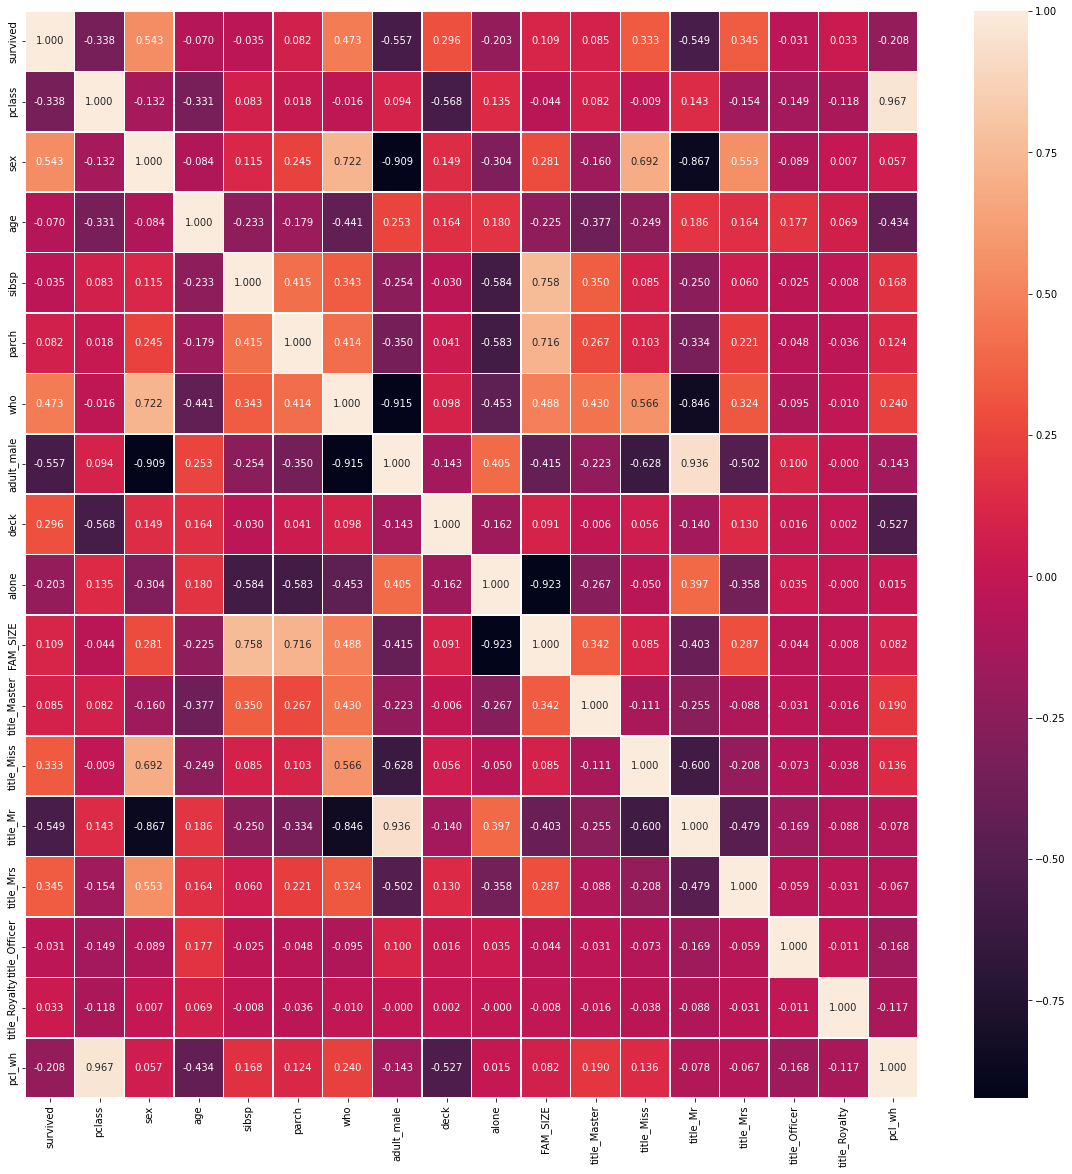

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(titanic.corr(), annot=True, linewidths=0.5, fmt= '.3f')

# Build the Models

The first task will be to **split the dataset** into train set and test set.

In [ ]:
X_train = titanic.drop("survived", axis=1)
Y_train = titanic["survived"]

In [ ]:
from sklearn.model_selection import train_test_split

# splitting data in training set(70%) and test set(30%).
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() #create the object of the model
lr = lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score

act = accuracy_score(y_train,lr.predict(x_train))
print('Training Accuracy is: ',(act*100))
p = precision_score(y_train,lr.predict(x_train))
print('Training Precision is: ',(p*100))
r = recall_score(y_train,lr.predict(x_train))
print('Training Recall is: ',(r*100))
f = f1_score(y_train,lr.predict(x_train))
print('Training F1 Score is: ',(f*100))



Training Accuracy is:  84.43017656500803
Training Precision is:  82.25108225108225
Training Recall is:  77.23577235772358
Training F1 Score is:  79.66457023060796


In [ ]:
act = accuracy_score(y_test,lr.predict(x_test))
print('Test Accuracy is: ',(act*100))
p = precision_score(y_test,lr.predict(x_test))
print('Test Precision is: ',(p*100))
r = recall_score(y_test,lr.predict(x_test))
print('Test Recall is: ',(r*100))
f = f1_score(y_test,lr.predict(x_test))
print('Test F1 Score is: ',(f*100))



Test Accuracy is:  83.2089552238806
Test Precision is:  77.41935483870968
Test Recall is:  75.0
Test F1 Score is:  76.19047619047619


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier



rf = RandomForestClassifier()
rf = rf.fit(x_train,y_train)

In [ ]:
act = accuracy_score(y_train,rf.predict(x_train))
print('Training Accuracy is: ',(act*100))
p = precision_score(y_train,rf.predict(x_train))
print('Training Precision is: ',(p*100))
r = recall_score(y_train,rf.predict(x_train))
print('Training Recall is: ',(r*100))
f = f1_score(y_train,rf.predict(x_train))
print('Training F1 Score is: ',(f*100))

Training Accuracy is:  94.86356340288926
Training Precision is:  96.12068965517241
Training Recall is:  90.65040650406505
Training F1 Score is:  93.30543933054393


In [ ]:
act = accuracy_score(y_test,rf.predict(x_test))
print('Test Accuracy is: ',(act*100))
p = precision_score(y_test,rf.predict(x_test))
print('Test Precision is: ',(p*100))
r = recall_score(y_test,rf.predict(x_test))
print('Test Recall is: ',(r*100))
f = f1_score(y_test,rf.predict(x_test))
print('Test F1 Score is: ',(f*100))

Test Accuracy is:  80.22388059701493
Test Precision is:  74.15730337078652
Test Recall is:  68.75
Test F1 Score is:  71.35135135135134


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt=dt.fit(x_train, y_train)

In [ ]:
act = accuracy_score(y_train,dt.predict(x_train))
print('Training Accuracy is: ',(act*100))
p = precision_score(y_train,dt.predict(x_train))
print('Training Precision is: ',(p*100))
r = recall_score(y_train,dt.predict(x_train))
print('Training Recall is: ',(r*100))
f = f1_score(y_train,dt.predict(x_train))
print('Training F1 Score is: ',(f*100))

Training Accuracy is:  94.86356340288926
Training Precision is:  98.1981981981982
Training Recall is:  88.6178861788618
Training F1 Score is:  93.16239316239316


In [ ]:
act = accuracy_score(y_test,dt.predict(x_test))
print('Test Accuracy is: ',(act*100))
p = precision_score(y_test,dt.predict(x_test))
print('Test Precision is: ',(p*100))
r = recall_score(y_test,dt.predict(x_test))
print('Test Recall is: ',(r*100))
f = f1_score(y_test,dt.predict(x_test))
print('Test F1 Score is: ',(f*100))

Test Accuracy is:  77.98507462686567
Test Precision is:  72.28915662650603
Test Recall is:  62.5
Test F1 Score is:  67.0391061452514


Since Random Forest Classifier performs the best, so that will be chosen as the final model.